In [ ]:
a <- read.table("step3_ukbb_random_out_LDpred_p1.0000e-03.txt", header = TRUE)

In [ ]:
head(a)

In [8]:
a$IID. <- gsub(",", "", a$IID.)
colnames(a)[1] <- c("IID")

In [6]:
phen <- read.table("phenotype_file.tsv", header = TRUE)

In [7]:
head(phen)

IID,PHEN
2365537,0
5270945,0
2516596,1
2807764,0
2350324,0
3651143,0


In [11]:
a_phen <- merge(a, phen, by = "IID")
head(a_phen)

IID,PRS,PHEN
1001207,5.016361,1
1001732,5.003023,0
1001874,5.026874,0
1001964,5.028892,0
1004458,5.044925,0
1004649,5.002404,0


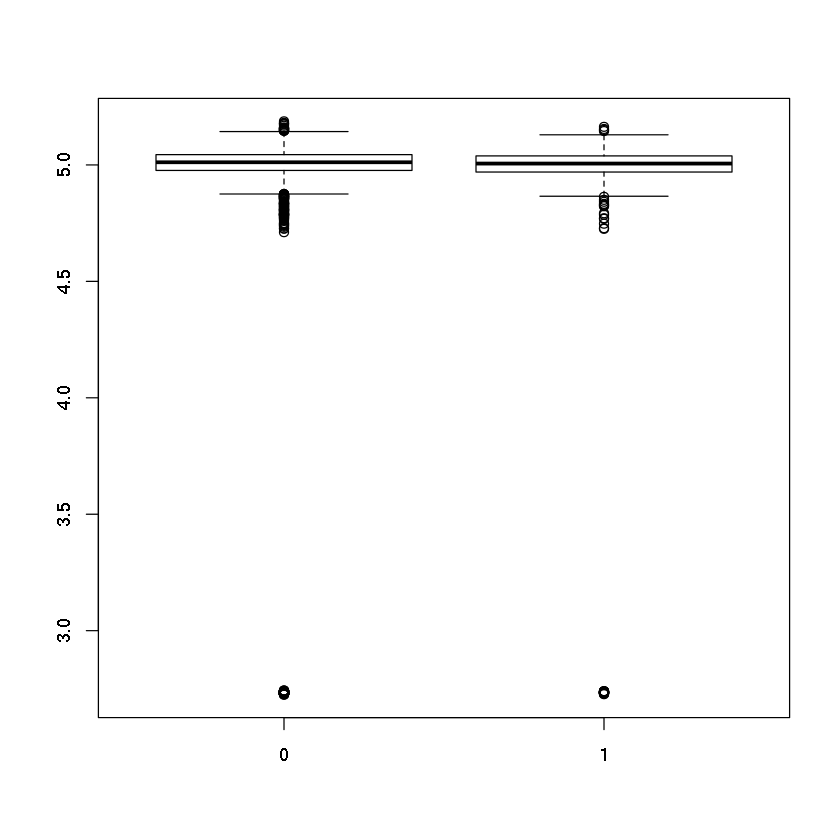

In [12]:
boxplot(PRS ~ PHEN, data = a_phen)

In [19]:
library(StatMeasures) #Create deciles for PRS
a_phen$decile <- decile(vector = a_phen$PRS)
head(a_phen)

In [22]:
library(dplyr)
a_phen$decile_d <- ntile(a_phen$PRS, 10)
head(a_phen)

IID,PRS,PHEN,decile,decile_d
1001207,5.016361,1,6,6
1001732,5.003023,0,5,5
1001874,5.026874,0,7,7
1001964,5.028892,0,7,7
1004458,5.044925,0,8,8
1004649,5.002404,0,5,5


In [35]:
decile_5 <- filter(a_phen, a_phen$decile == 5) # Make separate dataframe for each decile bin (which can then be used to count prevalence in each bin)
head(decile_5)
nrow(decile_5)
prevalence_decile_5 <- (sum(decile_5$PHEN)/nrow(decile_5))
(prevalence_decile_5)*100

IID,PRS,PHEN,decile,decile_d
1001732,5.003023,0,5,5
1004649,5.002404,0,5,5
1007635,5.001400,0,5,5
1010470,5.001482,0,5,5
1022775,5.007749,0,5,5
1023360,5.005093,0,5,5


[1] 1310

[1] 9.541985

In [33]:
decile_1 <- filter(a_phen, a_phen$decile == 1) # Make separate dataframe for each decile bin (which can then be used to count prevalence in each bin)
head(decile_1)
prevalence_decile_1 <- (sum(decile_1$PHEN)/nrow(decile_1))
(prevalence_decile_1)*100


IID,PRS,PHEN,decile,decile_d
1018517,4.929394,0,1,1
1020974,4.923094,0,1,1
1033295,4.903752,0,1,1
1037266,4.919018,0,1,1
1040217,4.938950,0,1,1
1041540,4.923846,0,1,1


[1] 12.29008

In [34]:
decile_10 <- filter(a_phen, a_phen$decile == 10) # Make separate dataframe for each decile bin (which can then be used to count prevalence in each bin)
head(decile_10)
prevalence_decile_10 <- (sum(decile_10$PHEN)/nrow(decile_10))
(prevalence_decile_10)*100

IID,PRS,PHEN,decile,decile_d
1005739,5.075747,1,10,10
1005750,5.082924,0,10,10
1006599,5.076991,0,10,10
1007565,5.091157,0,10,10
1009943,5.073005,1,10,10
1015798,5.092432,0,10,10


[1] 7.938931